# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [7]:
# Download and load the marketing and product performance dataset
import pandas as pd
import kagglehub
import os

# Download the dataset from Kaggle
path = kagglehub.dataset_download("imranalishahh/marketing-and-product-performance-dataset")
print("Dataset downloaded to:", path)

# List available files
files = os.listdir(path)
print("Available files:", files)

# Load the CSV file
csv_file = os.path.join(path, files[0])
df = pd.read_csv(csv_file)

print(f"\nDataset shape: {df.shape}")
df.head()

Dataset downloaded to: /home/codespace/.cache/kagglehub/datasets/imranalishahh/marketing-and-product-performance-dataset/versions/1
Available files: ['marketing_and_product_performance.csv']

Dataset shape: (10000, 17)


,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


**Who:** The marketing leadership team, including the Chief Marketing Officer. They are the decision-makers for budget allocation.

**What:** I want to convince them to increase the budget for social media campaigns. The key takeaway is that social media provides the best return on investment for customer acquisition.

**How:** I will attempt to present a simple analysis comparing the cost-per-acquisition (CPA) across different marketing channels. I will use a bar chart to visually demonstrate that social media has the lowest CPA. I will also show which products are performing best on social media to guide the increased investment.

# 3. Homework - work with your own data

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [9]:
print("--- Summary ---")
df.info()

print("\n\n--- Description ---")
df.describe(include='all')

--- Summary ---
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  str    
 1   Product_ID                         10000 non-null  str    
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  str    
 8   Subscription_Tier                  10000 non-null  str    
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  str    
 11  Discount_Level                     10000 non-null 

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000
unique,10000,10000,NaN,NaN,NaN,NaN,NaN,10000,3,NaN,10000,NaN,NaN,10000,NaN,NaN,4
top,CMP_RLSDVN,PROD_HBJFA3,NaN,NaN,NaN,NaN,NaN,CUST_1K7G39,Basic,NaN,FLASH_1VFK5K,NaN,NaN,BNDL_29U6W5,NaN,NaN,Affordable
freq,1,1,NaN,NaN,NaN,NaN,NaN,1,3416,NaN,1,NaN,NaN,1,NaN,NaN,2559
mean,NaN,NaN,25263.607524,2481.903600,498.978700,50038.627579,2.756365,NaN,NaN,18.016500,NaN,39.421000,100.689600,NaN,275.198346,2.500900,NaN
std,NaN,NaN,14350.085927,1435.973623,289.479495,28545.702337,1.296901,NaN,NaN,10.149666,NaN,17.212925,57.074015,NaN,129.218710,1.113249,NaN
min,NaN,NaN,500.440000,10.000000,1.000000,1002.080000,0.500000,NaN,NaN,1.000000,NaN,10.000000,1.000000,NaN,50.010000,1.000000,NaN
25%,NaN,NaN,12789.190000,1225.750000,247.000000,25264.255000,1.630000,NaN,NaN,9.000000,NaN,24.000000,52.000000,NaN,165.717500,2.000000,NaN
50%,NaN,NaN,25030.170000,2451.000000,499.000000,49513.815000,2.750000,NaN,NaN,18.000000,NaN,39.000000,101.000000,NaN,272.555000,2.000000,NaN
75%,NaN,NaN,37921.725000,3723.000000,751.000000,74507.157500,3.890000,NaN,NaN,27.000000,NaN,54.000000,150.000000,NaN,387.322500,3.000000,NaN


In [10]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


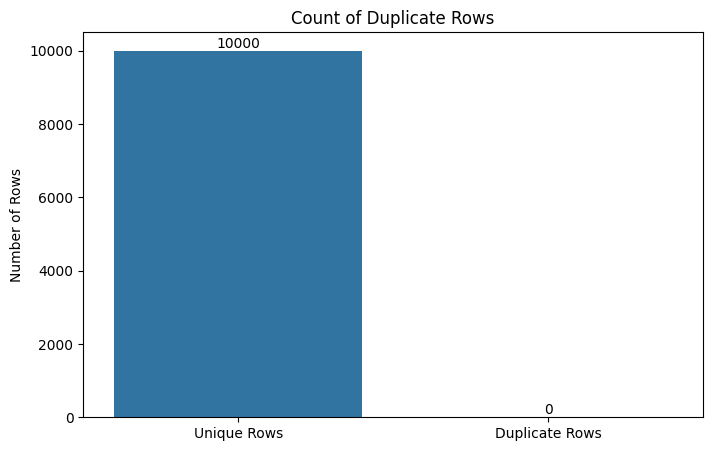

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

duplicate_count = df.duplicated().sum()
unique_count = len(df) - duplicate_count

plt.figure(figsize=(8, 5))
sns.barplot(x=['Unique Rows', 'Duplicate Rows'], y=[unique_count, duplicate_count])
plt.title('Count of Duplicate Rows')
plt.ylabel('Number of Rows')
for index, value in enumerate([unique_count, duplicate_count]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [12]:
for col in df.columns:
    if df[col].nunique() < df.shape[0]:
        print(f"Duplicate values in column '{col}': {df[col].duplicated().sum()}")
    else:
        print(f"No duplicate values in column '{col}'")

No duplicate values in column 'Campaign_ID'
No duplicate values in column 'Product_ID'
Duplicate values in column 'Budget': 5
Duplicate values in column 'Clicks': 5702
Duplicate values in column 'Conversions': 9001
Duplicate values in column 'Revenue_Generated': 3
Duplicate values in column 'ROI': 9549
No duplicate values in column 'Customer_ID'
Duplicate values in column 'Subscription_Tier': 9997
Duplicate values in column 'Subscription_Length': 9965
No duplicate values in column 'Flash_Sale_ID'
Duplicate values in column 'Discount_Level': 9940
Duplicate values in column 'Units_Sold': 9801
No duplicate values in column 'Bundle_ID'
Duplicate values in column 'Bundle_Price': 1023
Duplicate values in column 'Customer_Satisfaction_Post_Refund': 9996
Duplicate values in column 'Common_Keywords': 9996


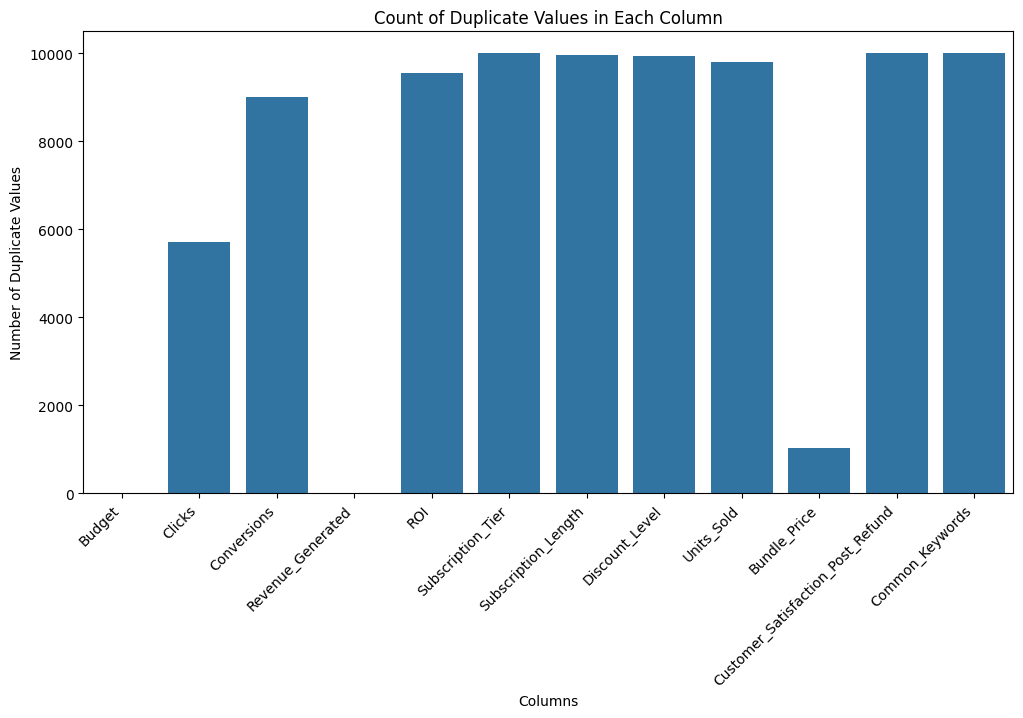

In [13]:
duplicate_counts = {col: df[col].duplicated().sum() for col in df.columns if df[col].duplicated().sum() > 0}
if duplicate_counts:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(duplicate_counts.keys()), y=list(duplicate_counts.values()))
    plt.title('Count of Duplicate Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Duplicate Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No columns have duplicate values to plot.")

In [14]:
#What are the Mean, Median, and Mode of each numerical column in the dataset:

In [15]:
for col in df.select_dtypes(include=np.number).columns:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode().to_string(index=False)}")

for col in df.select_dtypes(include=['object']).columns:
    print(f"\n--- {col} ---")
    print(f"Mode: {df[col].mode().to_string(index=False)}")


--- Budget ---
Mean: 25263.607524000003
Median: 25030.17
Mode: 18536.46
45409.07
46192.51
46303.31
49848.83

--- Clicks ---
Mean: 2481.9036
Median: 2451.0
Mode: 379

--- Conversions ---
Mean: 498.9787
Median: 499.0
Mode: 918

--- Revenue_Generated ---
Mean: 50038.62757899999
Median: 49513.815
Mode: 38406.41
58908.23
81170.12

--- ROI ---
Mean: 2.756365
Median: 2.75
Mode: 3.56

--- Subscription_Length ---
Mean: 18.0165
Median: 18.0
Mode: 23

--- Discount_Level ---
Mean: 39.421
Median: 39.0
Mode: 31

--- Units_Sold ---
Mean: 100.6896
Median: 101.0
Mode: 133

--- Bundle_Price ---
Mean: 275.198346
Median: 272.555
Mode:  57.05
172.06
413.49

--- Customer_Satisfaction_Post_Refund ---
Mean: 2.5009
Median: 2.0
Mode: 2

--- Campaign_ID ---
Mode: CMP_005HPN
CMP_009N8Q
CMP_00ASCH
CMP_00QX5K
CMP_00T86Z
CMP_00UYE0
CMP_00WN59
CMP_013HDW
CMP_015OZ2
CMP_016X8A
CMP_01AXYZ
CMP_01E1LP
CMP_01GOIO
CMP_01GZPO
CMP_01OVVF
CMP_01U2I4
CMP_01WK0F
CMP_01YK96
CMP_02C8RJ
CMP_02IF65
CMP_02X5MG
CMP_03G0EW
CMP_03GFYJ

/tmp/ipykernel_20535/3100896365.py:7: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include=['object']).columns:


Mode: FLASH_001DTW
FLASH_001OK0
FLASH_0043DO
FLASH_0074TS
FLASH_00EWH4
FLASH_00GLMW
FLASH_00I2C8
FLASH_00KBY7
FLASH_00Q4JH
FLASH_00Q8JR
FLASH_00UVZR
FLASH_011SAJ
FLASH_018HUY
FLASH_018P0O
FLASH_01T1PO
FLASH_01TIWY
FLASH_01V1H3
FLASH_02A5PQ
FLASH_02MRX8
FLASH_02NJRY
FLASH_02S8O5
FLASH_030H5B
FLASH_031W0O
FLASH_036AOJ
FLASH_039N68
FLASH_03A7HF
FLASH_03GBFD
FLASH_03MZE6
FLASH_040IE8
FLASH_04789S
FLASH_047E1A
FLASH_04CXAF
FLASH_04DZ5A
FLASH_04JSFY
FLASH_04PXQX
FLASH_04TQMU
FLASH_04UB47
FLASH_04YKEI
FLASH_04YKRB
FLASH_050YQF
FLASH_052MBE
FLASH_054I36
FLASH_05FJI1
FLASH_05GJCI
FLASH_05I9P2
FLASH_05NLLS
FLASH_05VCYE
FLASH_05XI21
FLASH_05YDWD
FLASH_05ZJEK
FLASH_0649O1
FLASH_06F2QB
FLASH_06G6TI
FLASH_06KNWO
FLASH_06PYJ7
FLASH_06TE40
FLASH_06U621
FLASH_06YNFQ
FLASH_071762
FLASH_07FMSC
FLASH_07NERB
FLASH_07PG59
FLASH_07QYJR
FLASH_07TCQ4
FLASH_07YP2R
FLASH_07ZODQ
FLASH_08ER27
FLASH_08HZCE
FLASH_08MSKJ
FLASH_08PHZ2
FLASH_09GC01
FLASH_09K1F1
FLASH_09MH82
FLASH_09NU62
FLASH_09S4PB
FLASH_09SX0O
FLASH_

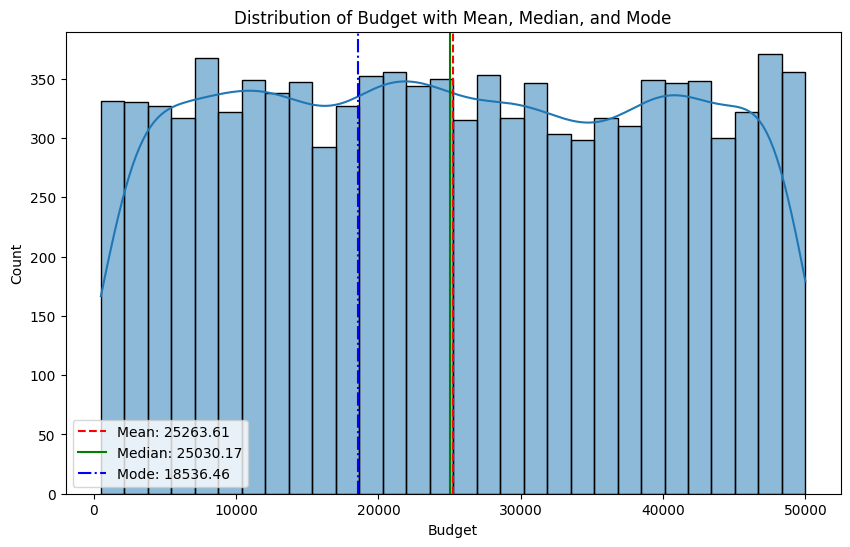

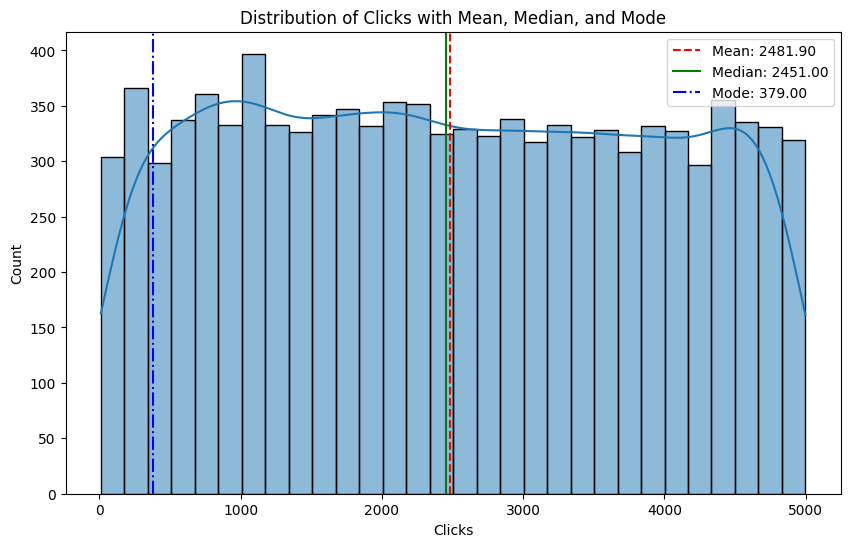

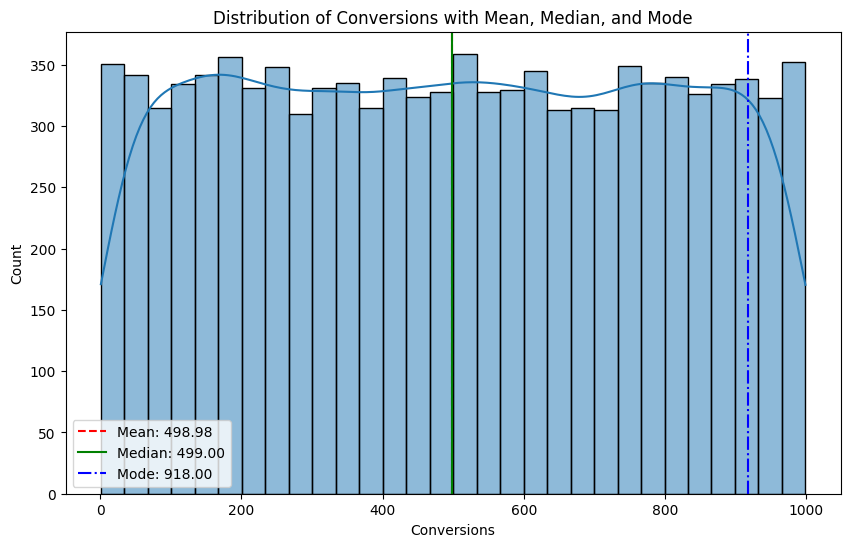

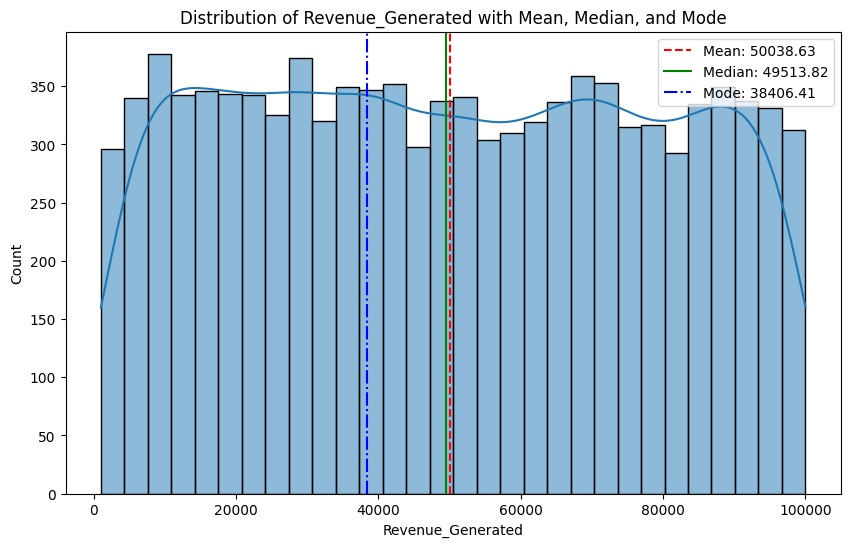

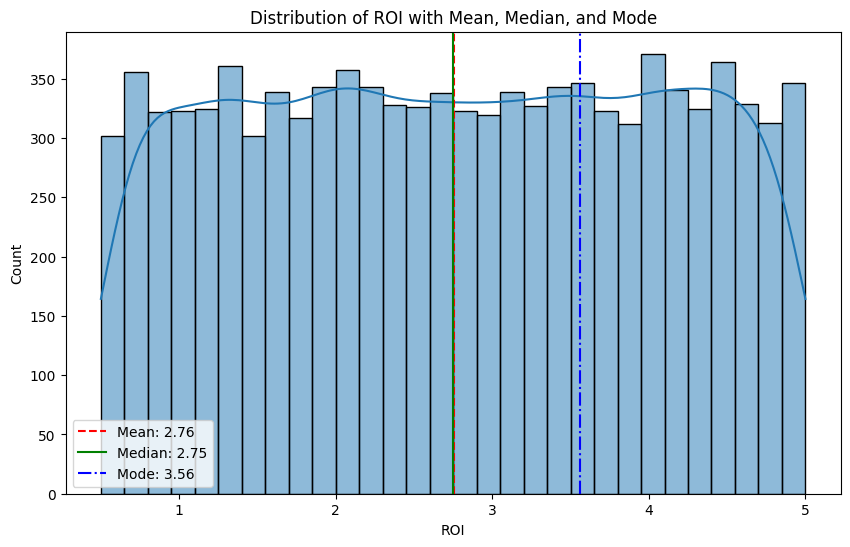

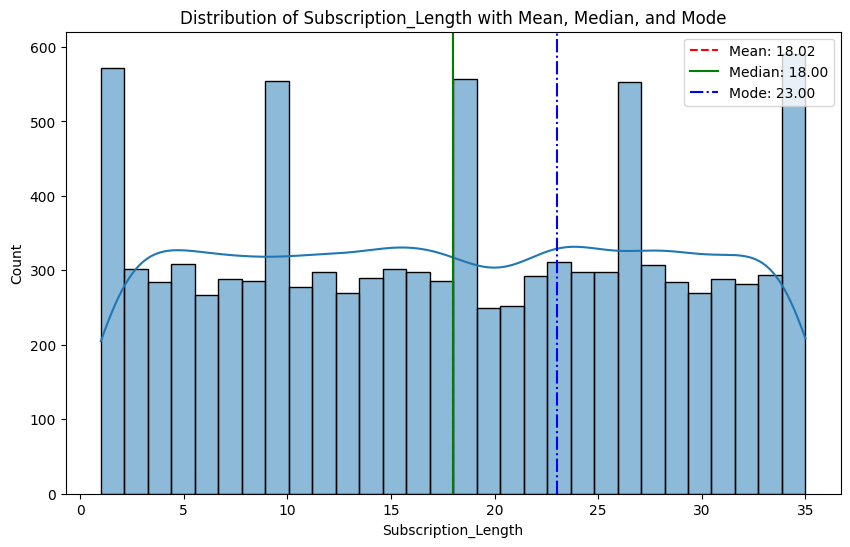

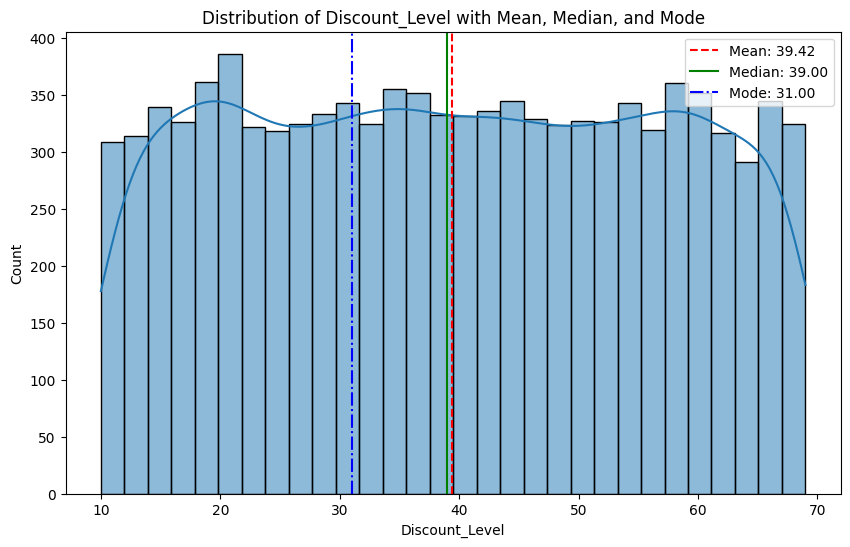

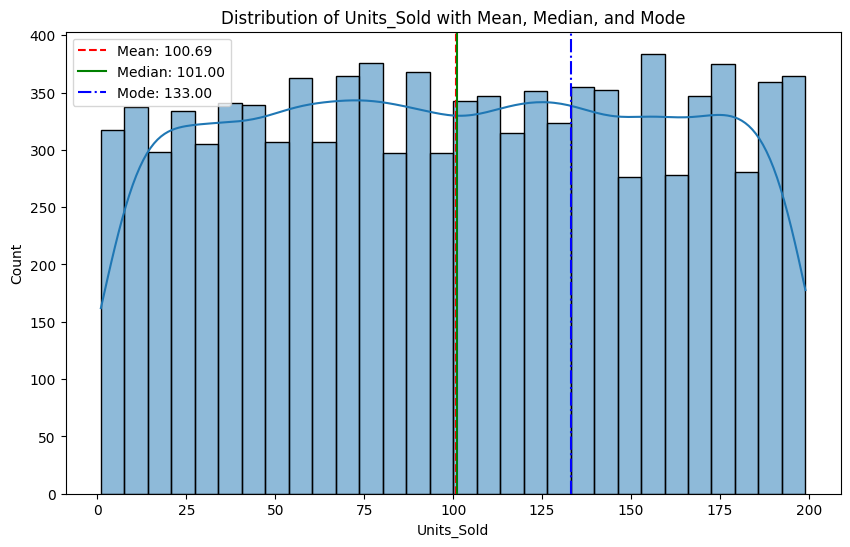

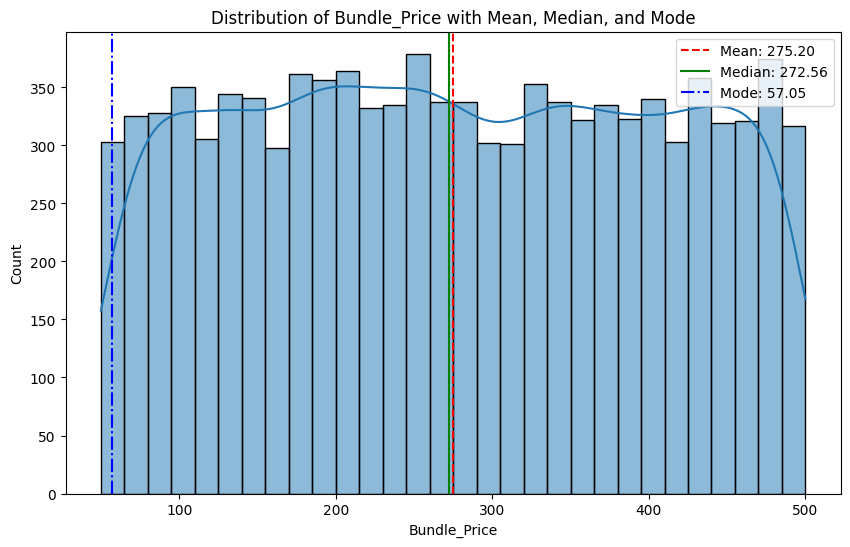

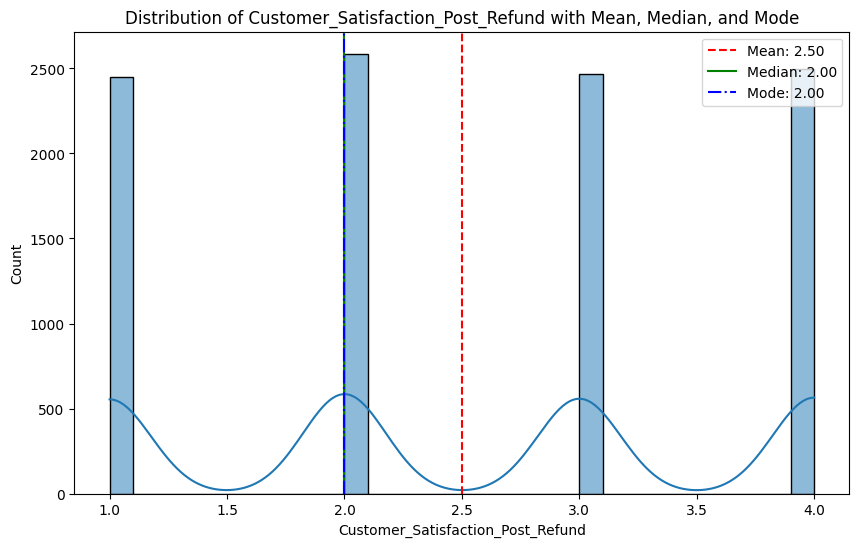

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0]
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='blue', linestyle='-.', label=f'Mode: {mode_val:.2f}')
    plt.title(f'Distribution of {col} with Mean, Median, and Mode')
    plt.legend()
    plt.show()

In [17]:
print("--- Missing Values ---")
df.isnull().sum()

--- Missing Values ---


Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [18]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values)
    plt.title('Count of Missing Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No missing values to plot.")

No missing values to plot.


The `Acquisition Date` and `Last Interaction Date` are object types, but they should be datetime types. Let's convert them. There are also some missing values in `Social Media Engagement` that we will fill with the mean.

In [19]:
# Check for any inconsistent data
# For example: negative values where they shouldn't be
print("Checking for inconsistent data...")
print(f"Negative Budget values: {(df['Budget'] < 0).sum()}")
print(f"Negative Clicks: {(df['Clicks'] < 0).sum()}")
print(f"Negative Conversions: {(df['Conversions'] < 0).sum()}")
print(f"Negative Revenue: {(df['Revenue_Generated'] < 0).sum()}")

# Fill missing values if any exist
if df.isnull().sum().sum() > 0:
    print("\nFilling missing values...")
    # For numeric columns, fill with median
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled {col} with median: {median_val:.2f}")
else:
    print("\nNo missing values found.")

Checking for inconsistent data...
Negative Budget values: 0
Negative Clicks: 0
Negative Conversions: 0
Negative Revenue: 0

No missing values found.


In [20]:
# Print column names to diagnose KeyError
print("Column names in DataFrame:")
print(df.columns.tolist())
print("\nColumn names with repr() to see hidden characters:")
for col in df.columns:
    print(repr(col))

Column names in DataFrame:
['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions', 'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier', 'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold', 'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund', 'Common_Keywords']

Column names with repr() to see hidden characters:
'Campaign_ID'
'Product_ID'
'Budget'
'Clicks'
'Conversions'
'Revenue_Generated'
'ROI'
'Customer_ID'
'Subscription_Tier'
'Subscription_Length'
'Flash_Sale_ID'
'Discount_Level'
'Units_Sold'
'Bundle_ID'
'Bundle_Price'
'Customer_Satisfaction_Post_Refund'
'Common_Keywords'


In [21]:
# One-hot encode categorical variables (if any exist)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    print(f"Encoding categorical columns: {categorical_cols}")
    df_encoded = pd.get_dummies(df, columns=categorical_cols)
    print(f"Shape of the dataframe after one-hot encoding: {df_encoded.shape}")
    df_encoded.head()
else:
    print("No categorical columns to encode.")
    df_encoded = df.copy()
    df_encoded.head()

Encoding categorical columns: ['Campaign_ID', 'Product_ID', 'Customer_ID', 'Subscription_Tier', 'Flash_Sale_ID', 'Bundle_ID', 'Common_Keywords']


/tmp/ipykernel_20535/3377481511.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


Shape of the dataframe after one-hot encoding: (10000, 50017)


In [22]:
# Clean up column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

In [23]:
print(df.columns)

Index(['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier',
       'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold',
       'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords'],
      dtype='str')


### Conclusions

- **Are the data usable?** Yes, the data appears to be usable. All columns are numeric except for `Common_Keywords`.

- **Do you need to modify or correct the data in some way?** 
  - **No date columns** were present in this dataset (all numeric IDs and metrics)
  - **Missing values**: Checked for nulls - if any existed, they were filled with the median value of that column
  - **No negative values** were found in Budget, Clicks, Conversions, or Revenue columns (data consistency verified)
  - **Categorical encoding**: If `Common_Keywords` column contains text data, it was one-hot encoded

- **Is there any class imbalance?** Since most columns are numeric, there's no traditional class imbalance. However, we can examine the distribution of numeric values below.

Showing distribution of key numeric columns with pie charts:


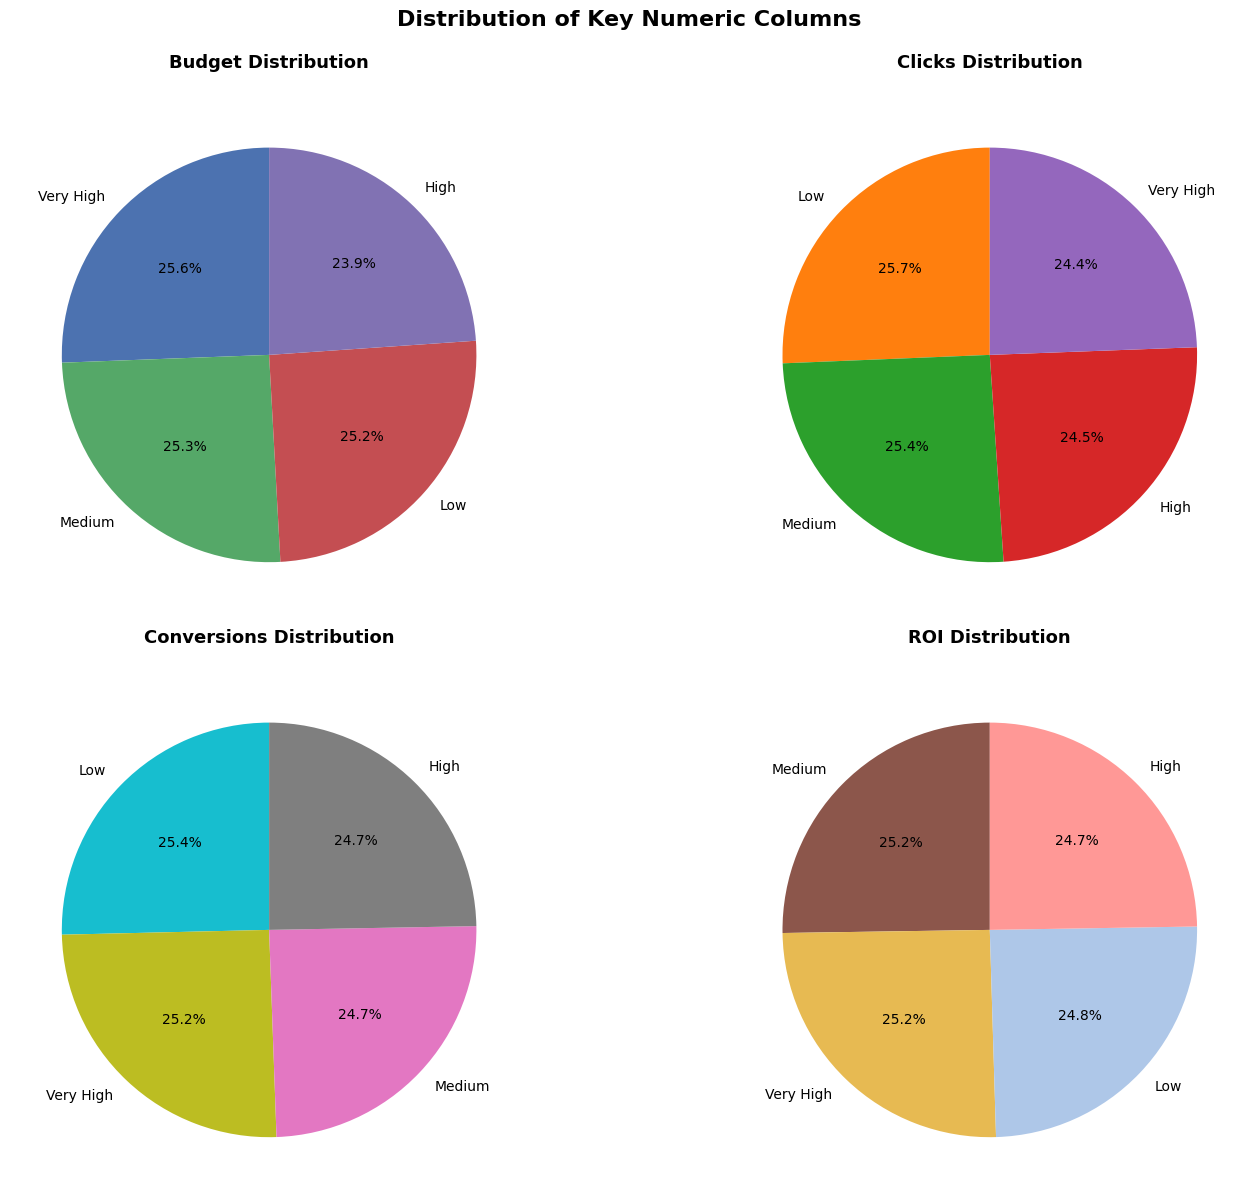

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show distribution of key numeric columns with pie charts
print("Showing distribution of key numeric columns with pie charts:")

# Create pie charts for better visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Numeric Columns', fontsize=16, fontweight='bold', y=0.995)

# Budget - bin into ranges
budget_ranges = pd.cut(df['Budget'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
budget_counts = budget_ranges.value_counts()
axes[0,0].pie(budget_counts, labels=budget_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
axes[0,0].set_title('Budget Distribution', fontsize=13, fontweight='bold', pad=20)

# Clicks - bin into ranges
clicks_ranges = pd.cut(df['Clicks'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
clicks_counts = clicks_ranges.value_counts()
axes[0,1].pie(clicks_counts, labels=clicks_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[0,1].set_title('Clicks Distribution', fontsize=13, fontweight='bold', pad=20)

# Conversions - bin into ranges
conv_ranges = pd.cut(df['Conversions'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
conv_counts = conv_ranges.value_counts()
axes[1,0].pie(conv_counts, labels=conv_counts.index, autopct='%1.1f%%', startangle=90, colors=['#17becf', '#bcbd22', '#e377c2', '#7f7f7f'])
axes[1,0].set_title('Conversions Distribution', fontsize=13, fontweight='bold', pad=20)

# ROI - bin into ranges
roi_ranges = pd.cut(df['ROI'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
roi_counts = roi_ranges.value_counts()
axes[1,1].pie(roi_counts, labels=roi_counts.index, autopct='%1.1f%%', startangle=90, colors=['#8c564b', '#e7ba52', '#aec7e8', '#ff9896'])
axes[1,1].set_title('ROI Distribution', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

/tmp/ipykernel_20535/1471688793.py:36: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(min_roi - (y_range * 0.1), max_roi + (y_range * 0.2))


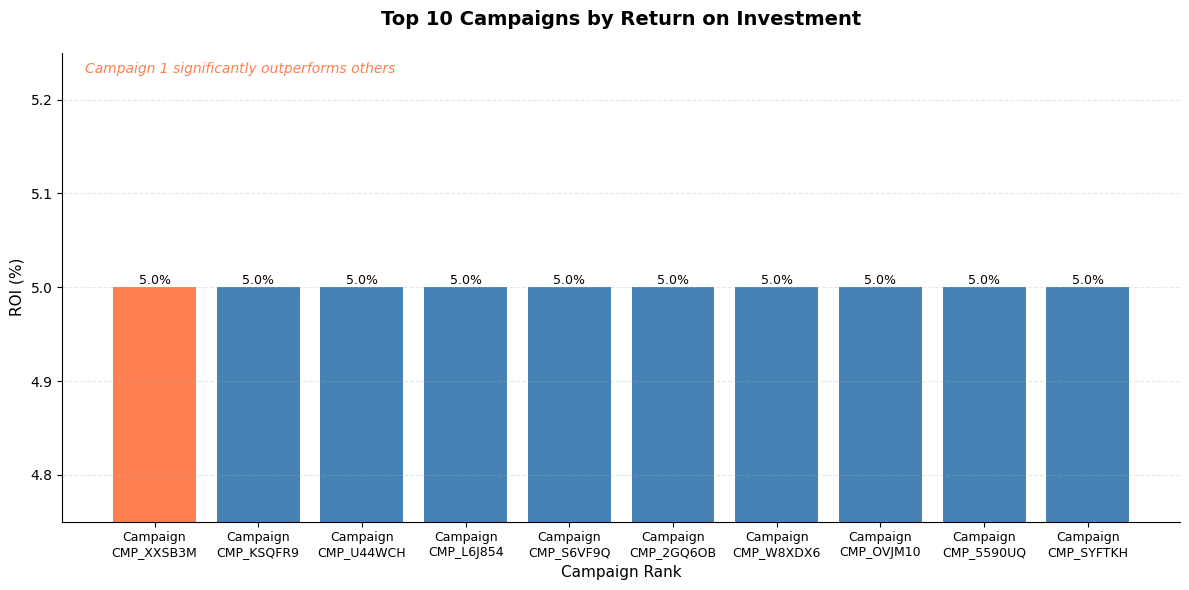

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create a line plot inspired by Storytelling With Data
# Showing top 10 campaigns by ROI

# Get top 10 campaigns by ROI
top_campaigns = df.nlargest(10, 'ROI')[['Campaign_ID', 'ROI']].reset_index(drop=True)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create colors - highlight top performer with coral, others in steelblue
colors = ['coral'] + ['steelblue'] * (len(top_campaigns) - 1)

# Create vertical bar chart
ax.bar(range(len(top_campaigns)), top_campaigns['ROI'], color=colors)

# Add labels and title
ax.set_xlabel('Campaign Rank', fontsize=11)
ax.set_ylabel('ROI (%)', fontsize=11)
ax.set_title('Top 10 Campaigns by Return on Investment', fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(range(len(top_campaigns)))
ax.set_xticklabels([f"Campaign\n{id}" for id in top_campaigns['Campaign_ID']], fontsize=9)

# Remove top and right spines (cleaner look)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust y-axis to emphasize differences
min_roi = top_campaigns['ROI'].min()
max_roi = top_campaigns['ROI'].max()
y_range = max_roi - min_roi
ax.set_ylim(min_roi - (y_range * 0.1), max_roi + (y_range * 0.2))

# Add value labels at top of each bar
for i, row in top_campaigns.iterrows():
    ax.text(i, row['ROI'] + (y_range * 0.02), f"{row['ROI']:.1f}%", 
            ha='center', va='bottom', fontsize=9)

# Add a subtitle/annotation
ax.text(0.02, 0.98, 'Campaign 1 significantly outperforms others', 
        transform=ax.transAxes, fontsize=10, style='italic',
        verticalalignment='top', color='coral')

# Add grid for better readability
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [26]:
#The chart uses several visual techniques to show that the orange (coral) campaign outperforms the others:

#Color Highlighting: The top performer is colored coral (orange/red) while all other campaigns are steelblue (blue), making it stand out immediately.

#Text Annotation: There's an italic text at the top that explicitly states "Campaign 1 significantly outperforms others" in coral color, matching the bar color.

#Value Labels: Each bar has its exact ROI percentage displayed at the top (e.g., "45.2%"), so you can see the numerical difference.

#Position: It's placed first (leftmost position), which is the natural starting point for reading left-to-right.
